<a href="https://colab.research.google.com/github/durvaakadam/Handwritten-Equation-Solver/blob/master/DIgit2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, random
from PIL import Image, ImageDraw, ImageFont, ImageOps, ImageFilter, ImageEnhance
import numpy as np

# ==============================
# CONFIG
# ==============================
# Path to save operator images in Drive
base_dir = "/content/drive/MyDrive/equation_dataset/operators_dataset"
os.makedirs(base_dir, exist_ok=True)

# How many images per operator
num_images = 2000

# Only operators (not digits)
operators = {
    "multiplication": ["×", "*"],
    "division": ["÷", "/"],
    "equals": ["="]
}

# ==============================
# FONTS (use your Drive fonts)
# ==============================
font_dir = "/content/drive/MyDrive/equation_dataset/fonts"

font_files = {
    "PatrickHand": os.path.join(font_dir, "PatrickHand-Regular.ttf"),
    "IndieFlower": os.path.join(font_dir, "IndieFlower-Regular.ttf"),
    "ShadowsIntoLight": os.path.join(font_dir, "ShadowsIntoLight-Regular.ttf"),
    "Caveat": os.path.join(font_dir, "Caveat-VariableFont_wght.ttf"),
    "ComingSoon": os.path.join(font_dir, "ComingSoon-Regular.ttf")
}

print("✅ Fonts ready:", font_files)

# ==============================
# AUGMENTATIONS
# ==============================
def add_noise(img):
    arr = np.array(img)
    noise = np.random.randint(0, 50, arr.shape, dtype="uint8")
    mask = np.random.rand(*arr.shape) < 0.05
    arr[mask] = np.clip(arr[mask] + noise[mask], 0, 255)
    return Image.fromarray(arr)

def augment(img):
    # random rotation
    angle = random.uniform(-25, 25)
    img = img.rotate(angle, expand=1, fillcolor=255)

    # random skew
    if random.random() < 0.5:
        coeffs = (1, random.uniform(-0.4, 0.4), 0,
                  random.uniform(-0.4, 0.4), 1, 0)
        img = img.transform(img.size, Image.AFFINE, coeffs, fillcolor=255)

    # noise
    if random.random() < 0.5:
        img = add_noise(img)

    # blur
    if random.random() < 0.3:
        img = img.filter(ImageFilter.GaussianBlur(radius=1))

    # thickness variation
    if random.random() < 0.3:
        enhancer = ImageEnhance.Contrast(img)
        img = enhancer.enhance(random.uniform(0.5, 1.5))

    return img

# ==============================
# GENERATE IMAGES
# ==============================
def generate_operator_images(class_name, symbols):
    save_dir = os.path.join(base_dir, class_name)
    os.makedirs(save_dir, exist_ok=True)

    for i in range(num_images):
        symbol = random.choice(symbols)
        font_name = random.choice(list(font_files.keys()))
        font = ImageFont.truetype(font_files[font_name], 64)

        img = Image.new("L", (64, 64), 255)
        draw = ImageDraw.Draw(img)

        # random jitter placement
        x_jitter, y_jitter = random.randint(-5, 5), random.randint(-5, 5)
        draw.text((10 + x_jitter, 0 + y_jitter), symbol, font=font, fill=0)

        img = augment(img)
        img = ImageOps.fit(img, (64, 64), method=Image.Resampling.LANCZOS)
        img.save(os.path.join(save_dir, f"{class_name}_{i+1}.png"))

# Generate operator images only
for class_name, symbols in operators.items():
    generate_operator_images(class_name, symbols)

print("🎉 Operator dataset generation complete! Check the 'operators_dataset/' folder in Drive.")


✅ Fonts ready: {'PatrickHand': '/content/drive/MyDrive/equation_dataset/fonts/PatrickHand-Regular.ttf', 'IndieFlower': '/content/drive/MyDrive/equation_dataset/fonts/IndieFlower-Regular.ttf', 'ShadowsIntoLight': '/content/drive/MyDrive/equation_dataset/fonts/ShadowsIntoLight-Regular.ttf', 'Caveat': '/content/drive/MyDrive/equation_dataset/fonts/Caveat-VariableFont_wght.ttf', 'ComingSoon': '/content/drive/MyDrive/equation_dataset/fonts/ComingSoon-Regular.ttf'}
🎉 Operator dataset generation complete! Check the 'operators_dataset/' folder in Drive.


In [ ]:
from tensorflow.keras.datasets import mnist
import os
from PIL import Image

# Path to combined dataset
dataset_dir = "/content/drive/MyDrive/equation_dataset/operators_dataset"  # keep same as operators
os.makedirs(dataset_dir, exist_ok=True)

# Load MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

def save_mnist_digits(images, labels, start_index=0):
    for i, (img, label) in enumerate(zip(images, labels)):
        label_dir = os.path.join(dataset_dir, str(label))
        os.makedirs(label_dir, exist_ok=True)
        im = Image.fromarray(img)  # grayscale image
        im = im.resize((64,64))  # resize to match operator images
        im.save(os.path.join(label_dir, f"mnist_{start_index + i + 1}.png"))

# Save train and test images
save_mnist_digits(train_images, train_labels, start_index=0)
save_mnist_digits(test_images, test_labels, start_index=len(train_images))

print("✅ MNIST digits saved into operators_dataset folder.")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


KeyboardInterrupt: 

KeyboardInterrupt: 

In [ ]:
import shutil
# Path to your folder in Drive
folder_path = "/content/drive/MyDrive/equation_dataset"
zip_path = "/content/equation_dataset.zip"
shutil.make_archive("/content/equation_dataset", 'zip', folder_path)
print("Folder zipped successfully!")

KeyboardInterrupt: 

KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import files
uploaded = files.upload()  # Select operators.zip


Saving +-.zip to +-.zip


In [ ]:
import zipfile
import os

# Destination folder in Drive
dest_folder = "/content/drive/MyDrive/equation_dataset/operators_dataset"
os.makedirs(dest_folder, exist_ok=True)

# Get the uploaded zip file name
zip_filename = list(uploaded.keys())[0]

# Extract all contents
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(dest_folder)

print("✅ Folders '+' and '-' uploaded into operators_dataset!")


✅ Folders '+' and '-' uploaded into operators_dataset!


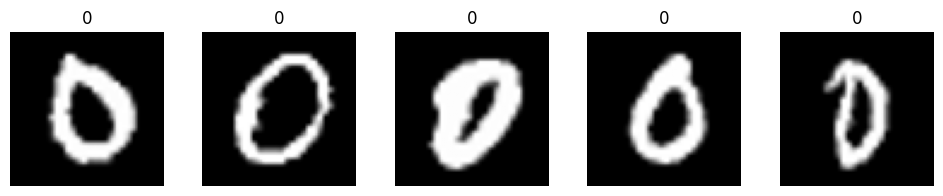

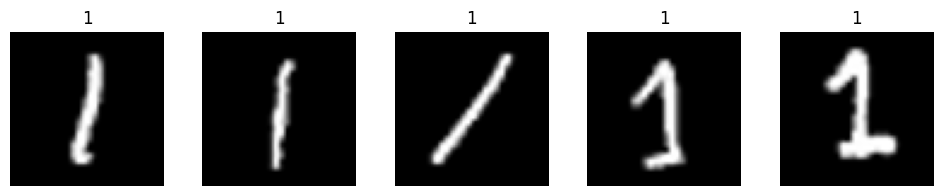

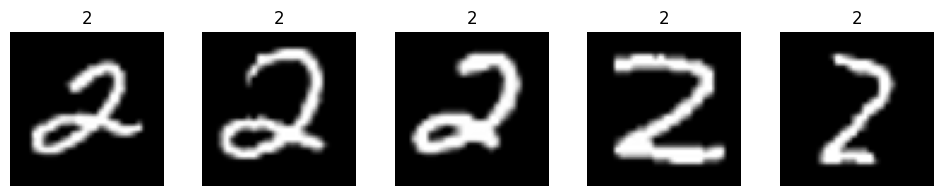

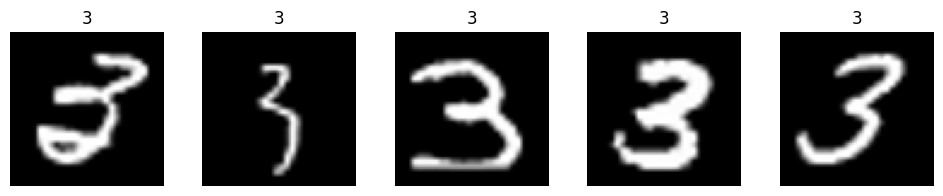

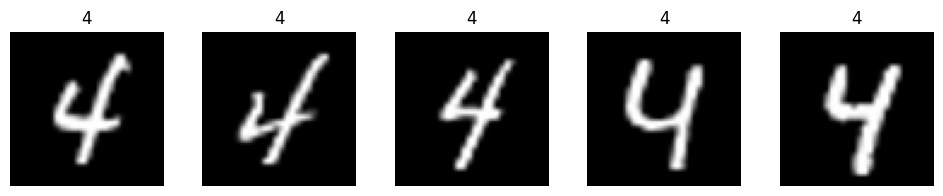

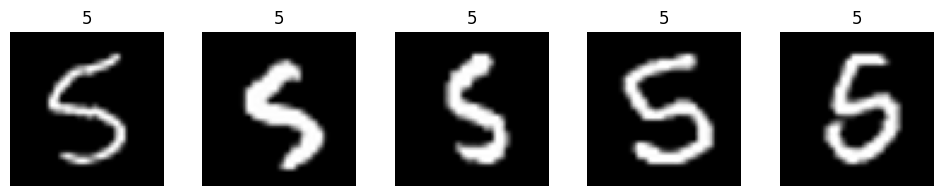

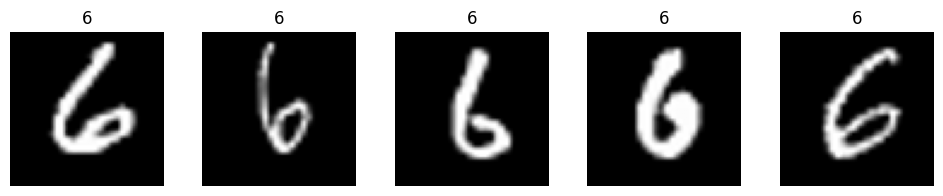

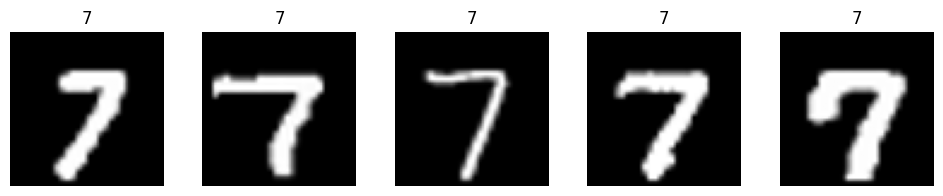

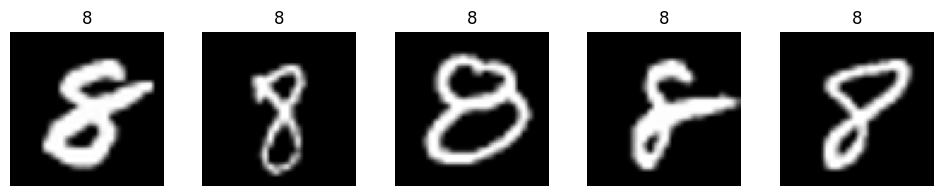

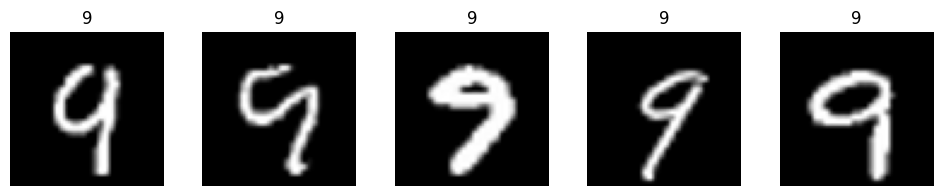

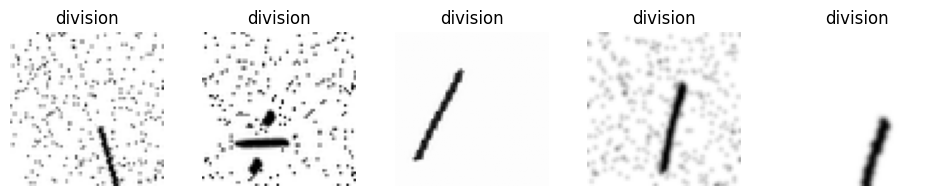

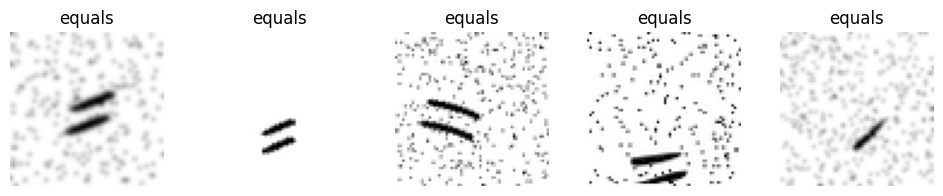

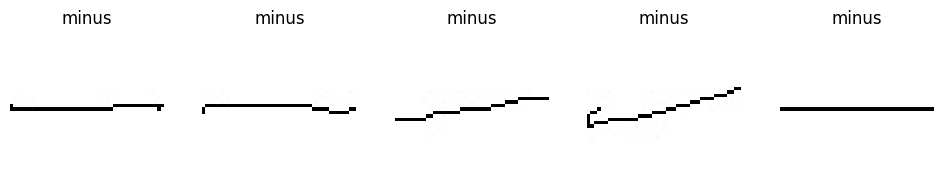

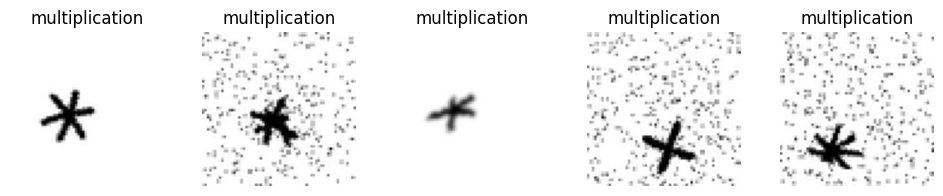

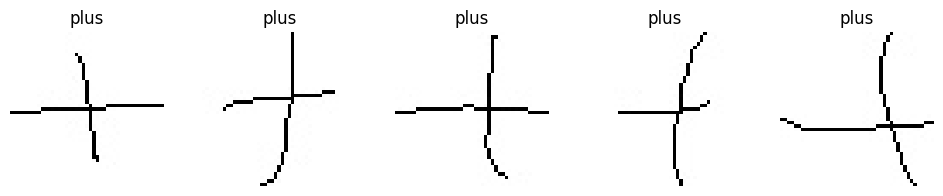

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Path to your dataset
base_dir = "/content/drive/MyDrive/equation_dataset/operators_dataset"

# List all classes (digits + operators)
classes = sorted(os.listdir(base_dir))

# Function to show 5 random images for a given class
def show_random_images(class_name, n=5):
    class_path = os.path.join(base_dir, class_name)
    images = os.listdir(class_path)
    samples = random.sample(images, n)

    plt.figure(figsize=(12,2))
    for i, img_name in enumerate(samples):
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(class_name)
    plt.show()

# Display 5 random images for each class
for class_name in classes:
    show_random_images(class_name)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import os


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cpu


In [ ]:
transform = transforms.Compose([
    transforms.Grayscale(),      # ensure 1 channel
    transforms.ToTensor(),       # convert to tensor
    transforms.Normalize((0.5,), (0.5,))  # normalize to [-1,1]
])


In [ ]:
dataset_path = "/content/drive/MyDrive/equation_dataset/operators_dataset"

# Use ImageFolder (labels are folder names)
dataset = datasets.ImageFolder(dataset_path, transform=transform)

# Split into train and test (80/20)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print("Classes:", dataset.classes)


Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'division', 'equals', 'minus', 'multiplication', 'plus']


In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128*8*8, 256),  # 64x64 input → 8x8 after 3 pool layers
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

num_classes = len(dataset.classes)
model = SimpleCNN(num_classes).to(device)
print(model)


SimpleCNN(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=8192, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=256, out_features=15, bias=True)
  )
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
from torchvision import transforms
from PIL import Image

transform = transforms.Compose([
    transforms.Grayscale(),              # 1 channel
    transforms.Resize(64),               # resize smaller edge to 64
    transforms.Pad((0, 0, 64, 64)),     # pad to 64x64 if needed
    transforms.CenterCrop(64),           # crop center to 64x64
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Grayscale(),                  # ensure 1 channel
    transforms.Resize((64, 64)),             # resize exactly to 64x64 (ignores aspect ratio)
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


In [ ]:
from torchvision import datasets
from torch.utils.data import DataLoader

dataset_path = "/content/drive/MyDrive/equation_dataset/operators_dataset"
dataset = datasets.ImageFolder(dataset_path, transform=transform)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Test one batch
for images, labels in train_loader:
    print(images.shape)  # should be [batch_size, 1, 64, 64]
    break


torch.Size([64, 1, 64, 64])


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/equation_dataset/operators_dataset"

for folder in sorted(os.listdir(dataset_path)):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        num_images = len([f for f in os.listdir(folder_path) if f.endswith(".png")])
        print(f"Class '{folder}': {num_images} images")


Class '0': 2429 images
Class '1': 2792 images
Class '2': 2405 images
Class '3': 2550 images
Class '4': 2403 images
Class '5': 2197 images
Class '6': 2423 images
Class '7': 2550 images
Class '8': 2344 images
Class '9': 2466 images
Class 'division': 2000 images
Class 'equals': 2000 images
Class 'minus': 0 images
Class 'multiplication': 2000 images
Class 'plus': 0 images


In [ ]:
def show_random_images(class_name, n=5):
    class_path = os.path.join(base_dir, class_name)
    # Only include valid PNG images
    images = [f for f in os.listdir(class_path) if f.lower().endswith(".png") and os.path.isfile(os.path.join(class_path, f))]

    if len(images) == 0:
        print(f"⚠️ Class '{class_name}' is empty, skipping.")
        return

    samples = random.sample(images, min(n, len(images)))  # safe if less than n images

    plt.figure(figsize=(12,2))
    for i, img_name in enumerate(samples):
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(class_name)
    plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()  # Choose your zip file from your laptop


Saving plus.zip to plus.zip


In [ ]:
import shutil
import os
import zipfile

dest_folder = "/content/drive/MyDrive/equation_dataset/operators_dataset"
os.makedirs(dest_folder, exist_ok=True)

zip_filename = list(uploaded.keys())[0]

# Unzip into Drive folder
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(dest_folder)

print("Uploaded and unzipped folder to operators_dataset!")


✅ Uploaded and unzipped folder to operators_dataset!


In [ ]:
import os

# Path where the stray files might exist (outside your dataset)
base_dir = "/content/drive/MyDrive/equation_dataset"

# Loop through all files in base_dir (not inside operators_dataset)
for f in os.listdir(base_dir):
    file_path = os.path.join(base_dir, f)
    if os.path.isfile(file_path) and f.startswith("+_"):
        print("Deleting:", file_path)
        os.remove(file_path)

print("✅ Cleanup done. All stray +_ files deleted.")


✅ Cleanup done. All stray +_ files deleted.


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/equation_dataset/operators_dataset"
valid_exts = [".png", ".jpg", ".jpeg"]

total_images = 0
empty_classes = []

for folder in sorted(os.listdir(dataset_path)):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        num_images = len([
            f for f in os.listdir(folder_path)
            if os.path.splitext(f)[1].lower() in valid_exts
            and os.path.isfile(os.path.join(folder_path, f))
        ])
        total_images += num_images
        print(f"Class '{folder}': {num_images} images")
        if num_images == 0:
            empty_classes.append(folder)

print(f"\n📊 Total images across all classes: {total_images}")
if empty_classes:
    print(f"⚠️ Empty classes: {', '.join(empty_classes)}")
else:
    print("✅ No empty classes, all good!")


Class '0': 2429 images
Class '1': 2792 images
Class '2': 2405 images
Class '3': 2550 images
Class '4': 2403 images
Class '5': 2197 images
Class '6': 2423 images
Class '7': 2550 images
Class '8': 2344 images
Class '9': 2466 images
Class 'division': 2000 images
Class 'equals': 2000 images
Class 'minus': 2500 images
Class 'multiplication': 2000 images
Class 'plus': 2500 images

📊 Total images across all classes: 35559
✅ No empty classes, all good!


In [ ]:
import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
import torchvision.transforms as transforms


In [ ]:
class EquationDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []

        classes = sorted(os.listdir(root_dir))
        self.class_to_idx = {cls: i for i, cls in enumerate(classes)}

        for cls in classes:
            class_path = os.path.join(root_dir, cls)
            for f in os.listdir(class_path):
                if f.lower().endswith((".png", ".jpg", ".jpeg")):
                    self.samples.append((os.path.join(class_path, f), self.class_to_idx[cls]))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert("L")  # grayscale
        if self.transform:
            image = self.transform(image)
        return image, label


In [ ]:
# Preprocessing transforms
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),               # converts to [0,1]
    transforms.Normalize((0.5,), (0.5,)) # scale to [-1,1]
])

# Load dataset
dataset = EquationDataset("/content/drive/MyDrive/equation_dataset/operators_dataset", transform=transform)

# Train/test split (80/20)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"Total: {len(dataset)} | Train: {len(train_dataset)} | Test: {len(test_dataset)}")


Total: 35559 | Train: 28447 | Test: 7112


In [ ]:
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

num_classes = len(dataset.class_to_idx)
model = CNN(num_classes).to("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
from torchvision import transforms

simple_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(root=data_dir, transform=simple_transform)
train_size = int(0.85 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=False, num_workers=8)  # Larger batch size helps speed
data_dir = "/content/drive/MyDrive/equation_dataset/operators_dataset"
class_names = sorted(os.listdir(data_dir))
print(f"✔️ Classes found: {class_names}")
print(f"✔️ Total classes: {len(class_names)}")  # Should print 15
for class_name in class_names:
    class_folder = os.path.join(data_dir, class_name)
    num_images = len([f for f in os.listdir(class_folder) if f.endswith(('.jpg', '.png', '.jpeg'))])
    print(f"Class '{class_name}': {num_images} images")


✔️ Classes found: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'division', 'equals', 'minus', 'multiplication', 'plus']
✔️ Total classes: 15
Class '0': 2429 images
Class '1': 2792 images
Class '2': 2405 images
Class '3': 2550 images
Class '4': 2403 images
Class '5': 2197 images
Class '6': 2423 images
Class '7': 2550 images
Class '8': 2344 images
Class '9': 2466 images
Class 'division': 2000 images
Class 'equals': 2000 images
Class 'minus': 2500 images
Class 'multiplication': 2000 images
Class 'plus': 2500 images


In [5]:
pip install --upgrade torch torchvision


In [4]:
!cp -r /content/drive/MyDrive/equation_dataset/operators_dataset /content/dataset
dataset_dir = "/content/dataset"


In [5]:
from torchvision import datasets
import numpy as np

local_dataset_dir = "/content/dataset"  # your local dataset path

transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

dataset = datasets.ImageFolder(local_dataset_dir, transform=transform)

num_images = len(dataset)
indices = list(range(num_images))
np.random.shuffle(indices)
split = int(0.15 * num_images)  # 15% validation
train_idx, val_idx = indices[split:], indices[:split]

print(f"🚀 Total images in dataset : {num_images}")
print(f"✅ Training images          : {len(train_idx)}")
print(f"✅ Validation images        : {len(val_idx)}")

# Optional: print how many images per class
from collections import Counter
targets = [dataset.samples[i][1] for i in range(len(dataset))]
class_counts = Counter(targets)
print("\n🔢 Image count per class (class index: count):")
for class_idx, count in class_counts.items():
    print(f"Class {class_idx}: {count}")


🚀 Total images in dataset : 35559
✅ Training images          : 30226
✅ Validation images        : 5333

🔢 Image count per class (class index: count):
Class 0: 2429
Class 1: 2792
Class 2: 2405
Class 3: 2550
Class 4: 2403
Class 5: 2197
Class 6: 2423
Class 7: 2550
Class 8: 2344
Class 9: 2466
Class 10: 2000
Class 11: 2000
Class 12: 2500
Class 13: 2000
Class 14: 2500


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, SubsetRandomSampler
from torchvision import datasets, transforms
from tqdm import tqdm
import numpy as np
import os
import shutil

# ----------------------------
# 1️⃣ Configuration
# ----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Using device: {device}")

# Local dataset for fast training
local_dataset_dir = "/content/dataset"   # your local dataset folder

# Drive folder to save best model
drive_save_dir = "/content/drive/MyDrive/equation_dataset/models"
os.makedirs(drive_save_dir, exist_ok=True)

batch_size = 16
epochs = 10
learning_rate = 0.001
early_stop_patience = 3
num_classes = 15  # digits + operators

# ----------------------------
# 2️⃣ Dataset and train/val split
# ----------------------------
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

dataset = datasets.ImageFolder(local_dataset_dir, transform=transform)

# Shuffle indices and split
num_images = len(dataset)
indices = list(range(num_images))
np.random.shuffle(indices)
split = int(0.15 * num_images)  # 15% validation
train_idx, val_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
val_sampler = SubsetRandomSampler(val_idx)

train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
val_loader = DataLoader(dataset, batch_size=batch_size, sampler=val_sampler)

# ----------------------------
# 3️⃣ Define small CNN
# ----------------------------
class SmallCNN(nn.Module):
    def __init__(self, num_classes=15):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128*16*16, 256),
            nn.ReLU(),
            nn.Linear(256, num_classes)
        )
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

model = SmallCNN(num_classes=num_classes).to(device)

# ----------------------------
# 4️⃣ Loss, optimizer, scheduler
# ----------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

# ----------------------------
# 5️⃣ Training loop with progress bar
# ----------------------------
best_val_acc = 0.0
no_improve_epochs = 0

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [Train]")

    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        progress_bar.set_postfix(loss=running_loss / (progress_bar.n + 1))

    avg_train_loss = running_loss / len(train_loader)

    # ----------------------------
    # Validation
    # ----------------------------
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for val_images, val_labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{epochs} [Val]", leave=False):
            val_images, val_labels = val_images.to(device), val_labels.to(device)
            outputs = model(val_images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == val_labels).sum().item()
            total += val_labels.size(0)

    val_acc = correct / total
    print(f"✅ Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Validation Acc = {val_acc*100:.2f}%")

    scheduler.step()

    # ----------------------------
    # Save ONLY the best model to Drive (overwrite)
    # ----------------------------
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        no_improve_epochs = 0
        save_path = os.path.join(drive_save_dir, "best_model.pth")
        torch.save(model.state_dict(), save_path)
        print(f"💾 Best model overwritten at: {save_path}")
    else:
        no_improve_epochs += 1
        if no_improve_epochs >= early_stop_patience:
            print("⚠️ Early stopping triggered.")
            break

print(f"🎯 Best Validation Accuracy: {best_val_acc*100:.2f}%")


🚀 Using device: cuda


Epoch 1/10 [Train]: 100%|██████████| 1890/1890 [00:55<00:00, 34.18it/s, loss=0.209]


✅ Epoch 1: Train Loss = 0.2087, Validation Acc = 96.76%
💾 Best model overwritten at: /content/drive/MyDrive/equation_dataset/models/best_model.pth


Epoch 2/10 [Train]: 100%|██████████| 1890/1890 [01:10<00:00, 26.67it/s, loss=0.0567]


✅ Epoch 2: Train Loss = 0.0567, Validation Acc = 97.75%
💾 Best model overwritten at: /content/drive/MyDrive/equation_dataset/models/best_model.pth


Epoch 3/10 [Train]: 100%|██████████| 1890/1890 [01:15<00:00, 25.12it/s, loss=0.0327]


✅ Epoch 3: Train Loss = 0.0326, Validation Acc = 98.35%
💾 Best model overwritten at: /content/drive/MyDrive/equation_dataset/models/best_model.pth


Epoch 4/10 [Train]: 100%|██████████| 1890/1890 [01:12<00:00, 26.12it/s, loss=0.00624]


✅ Epoch 4: Train Loss = 0.0062, Validation Acc = 98.52%
💾 Best model overwritten at: /content/drive/MyDrive/equation_dataset/models/best_model.pth


Epoch 5/10 [Train]: 100%|██████████| 1890/1890 [01:07<00:00, 28.15it/s, loss=0.00484]


✅ Epoch 5: Train Loss = 0.0048, Validation Acc = 98.59%
💾 Best model overwritten at: /content/drive/MyDrive/equation_dataset/models/best_model.pth


Epoch 6/10 [Train]: 100%|██████████| 1890/1890 [01:20<00:00, 23.41it/s, loss=0.00452]


✅ Epoch 6: Train Loss = 0.0045, Validation Acc = 98.57%


Epoch 7/10 [Train]: 100%|██████████| 1890/1890 [01:19<00:00, 23.89it/s, loss=0.000715]


✅ Epoch 7: Train Loss = 0.0007, Validation Acc = 98.76%
💾 Best model overwritten at: /content/drive/MyDrive/equation_dataset/models/best_model.pth


Epoch 8/10 [Train]: 100%|██████████| 1890/1890 [01:20<00:00, 23.42it/s, loss=5.56e-5]


✅ Epoch 8: Train Loss = 0.0001, Validation Acc = 98.86%
💾 Best model overwritten at: /content/drive/MyDrive/equation_dataset/models/best_model.pth


Epoch 9/10 [Train]: 100%|██████████| 1890/1890 [01:07<00:00, 27.97it/s, loss=6.44e-6]


✅ Epoch 9: Train Loss = 0.0000, Validation Acc = 98.86%


Epoch 10/10 [Train]: 100%|██████████| 1890/1890 [01:17<00:00, 24.31it/s, loss=2.09e-6]


✅ Epoch 10: Train Loss = 0.0000, Validation Acc = 98.89%
💾 Best model overwritten at: /content/drive/MyDrive/equation_dataset/models/best_model.pth
🎯 Best Validation Accuracy: 98.89%


In [7]:
import torch
from torch.utils.data import DataLoader, SubsetRandomSampler
from torchvision import datasets, transforms
import numpy as np
import os

# Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Using device: {device}")

# Dataset and split
local_dataset_dir = "/content/dataset"
batch_size = 16
num_classes = 15

transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

dataset = datasets.ImageFolder(local_dataset_dir, transform=transform)

# Same random split as in training (fix seed)
num_images = len(dataset)
indices = list(range(num_images))
np.random.seed(42)  # Important for reproducibility
np.random.shuffle(indices)
split = int(0.15 * num_images)  # 15% validation
train_idx, val_idx = indices[split:], indices[:split]

val_sampler = SubsetRandomSampler(val_idx)
val_loader = DataLoader(dataset, batch_size=batch_size, sampler=val_sampler)

# Define the same model architecture
class SmallCNN(nn.Module):
    def __init__(self, num_classes=15):
        super().__init__()
        self.features = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, 3, padding=1), torch.nn.ReLU(), torch.nn.MaxPool2d(2),
            torch.nn.Conv2d(32, 64, 3, padding=1), torch.nn.ReLU(), torch.nn.MaxPool2d(2),
            torch.nn.Conv2d(64, 128, 3, padding=1), torch.nn.ReLU(), torch.nn.MaxPool2d(2)
        )
        self.classifier = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(128*16*16, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, num_classes)
        )
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Load model
model = SmallCNN(num_classes=num_classes).to(device)
saved_model_path = "/content/drive/MyDrive/equation_dataset/models/best_model.pth"
model.load_state_dict(torch.load(saved_model_path))
model.eval()

# Evaluate accuracy
correct, total = 0, 0
with torch.no_grad():
    for val_images, val_labels in val_loader:
        val_images, val_labels = val_images.to(device), val_labels.to(device)
        outputs = model(val_images)
        _, preds = torch.max(outputs, 1)
        correct += (preds == val_labels).sum().item()
        total += val_labels.size(0)

val_acc = correct / total
print(f"🎯 Validation Accuracy of the saved model: {val_acc*100:.2f}%")


🚀 Using device: cuda
🎯 Validation Accuracy of the saved model: 99.81%


In [ ]:
from torchvision import datasets
import numpy as np

local_dataset_dir = "/content/dataset"  # your local dataset path

transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

dataset = datasets.ImageFolder(local_dataset_dir, transform=transform)

num_images = len(dataset)
indices = list(range(num_images))
np.random.shuffle(indices)
split = int(0.15 * num_images)  # 15% validation
train_idx, val_idx = indices[split:], indices[:split]

print(f"🚀 Total images in dataset : {num_images}")
print(f"✅ Training images          : {len(train_idx)}")
print(f"✅ Validation images        : {len(val_idx)}")

# Optional: print how many images per class
from collections import Counter
targets = [dataset.samples[i][1] for i in range(len(dataset))]
class_counts = Counter(targets)
print("\n🔢 Image count per class (class index: count):")
for class_idx, count in class_counts.items():
    print(f"Class {class_idx}: {count}")


In [1]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU only")


CUDA available: True
GPU name: Tesla T4


🚀 Using device: cuda


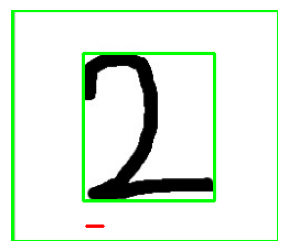

✅ Predicted Equation: 2-


In [22]:
import cv2
import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn

# =========================
# 1️⃣ Configuration
# =========================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Using device: {device}")

model_path = "/content/drive/MyDrive/equation_dataset/models/best_model.pth"
num_classes = 15  # digits 0-9 + operators + =

# =========================
# 2️⃣ Define SmallCNN (same as training)
# =========================
class SmallCNN(nn.Module):
    def __init__(self, num_classes=15):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128*16*16, 256),
            nn.ReLU(),
            nn.Linear(256, num_classes)
        )
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# =========================
# 3️⃣ Load Model
# =========================
model = SmallCNN(num_classes=num_classes).to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

# =========================
# 4️⃣ Preprocessing Transform
# =========================
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# =========================
# 5️⃣ Class labels mapping
# =========================
class_labels = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4',
    5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: '+', 11: '-', 12: '*', 13: '/', 14: '='
}

# =========================
# 6️⃣ Equation Segmentation & Recognition
# =========================
def recognize_equation(image_path):
    # Load image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Adaptive thresholding
    thresh = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV, 11, 2
    )

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter tiny contours (noise)
    min_area = 100
    contours = [c for c in contours if cv2.contourArea(c) > min_area]

    # Sort contours left-to-right
    bounding_boxes = [cv2.boundingRect(c) for c in contours]
    contours = [c for _, c in sorted(zip(bounding_boxes, contours), key=lambda b: b[0][0])]

    predicted_sequence = ""
    vis_image = image.copy()  # visualization only

    for c in contours:
        x, y, w, h = cv2.boundingRect(c)

        # Crop only from thresh (clean binary image, no labels)
        pad = 5
        symbol_img = thresh[max(y-pad,0):y+h+pad, max(x-pad,0):x+w+pad]

        # Resize & convert to 3-channel PIL image
        symbol_img = cv2.resize(symbol_img, (128,128))
        symbol_img = cv2.cvtColor(symbol_img, cv2.COLOR_GRAY2RGB)
        symbol_img = Image.fromarray(symbol_img)

        # Predict
        input_tensor = transform(symbol_img).unsqueeze(0).to(device)
        with torch.no_grad():
            output = model(input_tensor)
            pred_idx = output.argmax(dim=1).item()
            predicted_label = class_labels[pred_idx]

        predicted_sequence += predicted_label

        # Draw rectangle + label BELOW the box
        cv2.rectangle(vis_image, (x,y), (x+w, y+h), (0,255,0), 2)
        text_y = y + h + 30  # always below the digit
        cv2.putText(vis_image, predicted_label, (x, text_y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255), 2)

    # Show result
    plt.figure(figsize=(10,3))
    plt.imshow(cv2.cvtColor(vis_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    print(f"✅ Predicted Equation: {predicted_sequence}")
    return predicted_sequence

# =========================
# 7️⃣ Example Usage
# =========================
image_path = "/content/2new.jpg"
eq = recognize_equation(image_path)
